In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data = pd.read_csv("Fraud_Detection.csv")
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,...,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000,99776.000000
mean,42512.326832,-0.270695,-0.024058,0.657125,0.173522,-0.283754,0.091063,-0.121257,0.052796,-0.052008,...,-0.028584,-0.108665,-0.036607,0.008733,0.131621,0.026571,0.000296,0.002010,98.166535,0.004931
std,17488.724792,1.890413,1.678539,1.406177,1.372090,1.379589,1.304693,1.299613,1.268675,1.133966,...,0.766596,0.641080,0.638218,0.595000,0.442029,0.494770,0.400861,0.325992,265.091658,0.070048
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33452.000000,-1.031193,-0.597659,0.172367,-0.708895,-0.900604,-0.650199,-0.602878,-0.137719,-0.702465,...,-0.224387,-0.531342,-0.176572,-0.324092,-0.132378,-0.325209,-0.062601,-0.005376,7.530000,0.000000
50%,44252.000000,-0.262837,0.079598,0.750652,0.196889,-0.314849,-0.158707,-0.070383,0.074152,-0.120310,...,-0.057172,-0.083665,-0.049238,0.064647,0.169859,-0.070415,0.009919,0.023352,26.310000,0.000000
75%,55777.250000,1.152963,0.740262,1.374722,1.039248,0.250214,0.485321,0.414467,0.361241,0.557531,...,0.120507,0.309041,0.081874,0.406041,0.419740,0.300823,0.083486,0.076950,89.000000,0.000000
max,170348.000000,2.132386,22.057729,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99776 entries, 0 to 99775
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    99776 non-null  int64  
 1   V1      99776 non-null  float64
 2   V2      99776 non-null  float64
 3   V3      99776 non-null  float64
 4   V4      99776 non-null  float64
 5   V5      99776 non-null  float64
 6   V6      99776 non-null  float64
 7   V7      99776 non-null  float64
 8   V8      99776 non-null  float64
 9   V9      99776 non-null  float64
 10  V10     99776 non-null  float64
 11  V11     99776 non-null  float64
 12  V12     99776 non-null  float64
 13  V13     99776 non-null  float64
 14  V14     99776 non-null  float64
 15  V15     99776 non-null  float64
 16  V16     99776 non-null  float64
 17  V17     99776 non-null  float64
 18  V18     99776 non-null  float64
 19  V19     99776 non-null  float64
 20  V20     99776 non-null  float64
 21  V21     99776 non-null  float64
 22

(array([99284.,   492.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

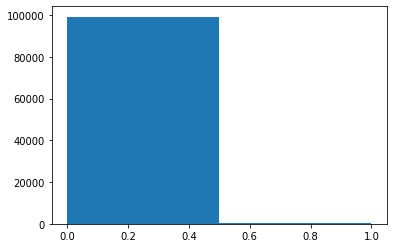

In [4]:
plt.hist(data["Class"], bins = 2) #We can see a huge class imbalance with number of non-fraud examples significantly higher than fraudulent ones

In [5]:
data["Class"].value_counts()

0    99284
1      492
Name: Class, dtype: int64

In [6]:
#sample negative and positive samples in a 5:1 ratio
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0].sample(len(fraud) * 5)
non_fraud.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
new_data = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)
new_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,...,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
mean,48969.863821,-0.968125,0.540971,-0.609728,0.893065,-0.780221,-0.186571,-1.011503,0.168169,-0.481728,...,0.093921,-0.089710,-0.056157,-0.023428,0.122575,0.027569,0.023873,0.012640,103.200647,0.166667
std,28598.267424,3.681929,2.678308,4.261053,2.339973,2.731672,1.471738,3.728033,2.921886,1.730354,...,1.679459,0.823262,0.779167,0.576069,0.510910,0.484731,0.679162,0.351428,240.987346,0.372741
min,95.000000,-31.746663,-25.936137,-31.813586,-4.788249,-22.245025,-16.107178,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.468339,-4.781606,-1.697018,-8.567638,-4.284844,0.000000,0.000000
25%,34450.250000,-1.310231,-0.491212,-0.315982,-0.505279,-1.108600,-0.825940,-0.858573,-0.144368,-1.058823,...,-0.209708,-0.526394,-0.195961,-0.353456,-0.152962,-0.315490,-0.057837,-0.008126,5.800000,0.000000
50%,46310.000000,-0.369533,0.210989,0.564780,0.510297,-0.382494,-0.273947,-0.193369,0.091521,-0.303350,...,-0.025446,-0.077594,-0.056412,0.044686,0.164264,-0.077217,0.020887,0.026444,27.665000,0.000000
75%,59303.750000,1.132345,1.033077,1.214371,1.433447,0.212392,0.363721,0.346442,0.471147,0.409545,...,0.204550,0.323456,0.079609,0.383657,0.429429,0.315994,0.132440,0.099830,99.460000,0.000000
max,170348.000000,2.132386,22.057729,3.594907,12.114672,24.363532,6.702511,8.047611,20.007208,9.234623,...,27.202839,8.361985,5.466230,1.425953,2.208209,2.745261,3.052358,4.783772,3336.000000,1.000000


In [7]:
null_count = new_data.isnull().sum(axis=0).sum()
print(null_count)

0


In [8]:
values_count = new_data.nunique().sort_values() #data does not have any null or duplicate values
np.sum(values_count == 1)

0

In [9]:
duplicates = []
for i, ref in enumerate(new_data.columns[:-1]):
    for other in new_data.columns[i + 1:-1]:
        if other not in duplicates and np.all(new_data[ref] == new_data[other]):
            duplicates.append(other)    
len(duplicates)

0

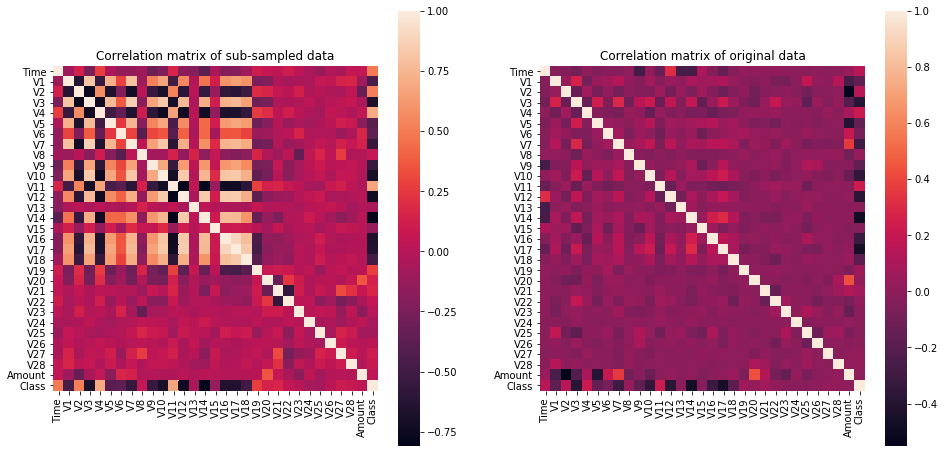

In [10]:
#We see a correlation of the target variable with a few features based on the heatmap (Time,V2,V4,V11)
corrmat = new_data.corr()
corrmat_orig = data.corr()
f, ax = plt.subplots(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Correlation matrix of sub-sampled data')
sns.heatmap(corrmat, vmax=1, square=True)
plt.subplot(1, 2, 2)
plt.title('Correlation matrix of original data')
sns.heatmap(corrmat_orig, vmax=1, square=True)

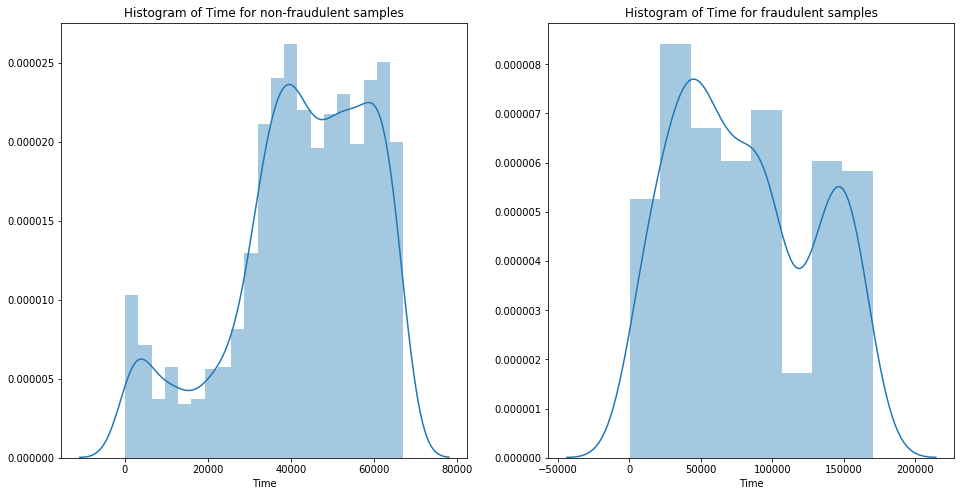

In [11]:
#We see on taking a random sample of data the prob distribution 
#varies with Time for fraudulent and non-fraudulent datapoints, signifying Time affects the Class output.

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Histogram of Time for non-fraudulent samples')
sns.distplot(non_fraud["Time"])
plt.subplot(1, 2, 2)
plt.title('Histogram of Time for fraudulent samples')
sns.distplot(fraud["Time"])

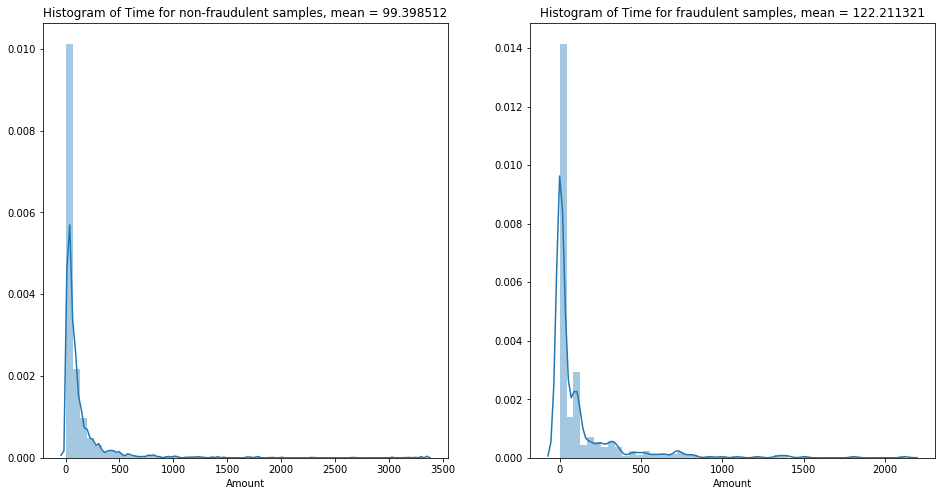

In [12]:
#We see on taking a random sample of data the prob distrbution 
#varies with Time for fraudulent and non-fraudulent datapoints, signifying Amount affects the Class output.

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Histogram of Time for non-fraudulent samples, mean = %f' % (non_fraud["Amount"].mean()))
sns.distplot(non_fraud["Amount"])
plt.subplot(1, 2, 2)
plt.title('Histogram of Time for fraudulent samples, mean = %f' % (fraud["Amount"].mean()))
sns.distplot(fraud["Amount"])

In [13]:
important_feats = new_data.columns[np.abs(corrmat["Class"]) > 0.5]
important_feats

Index(['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'Class'],
      dtype='object')

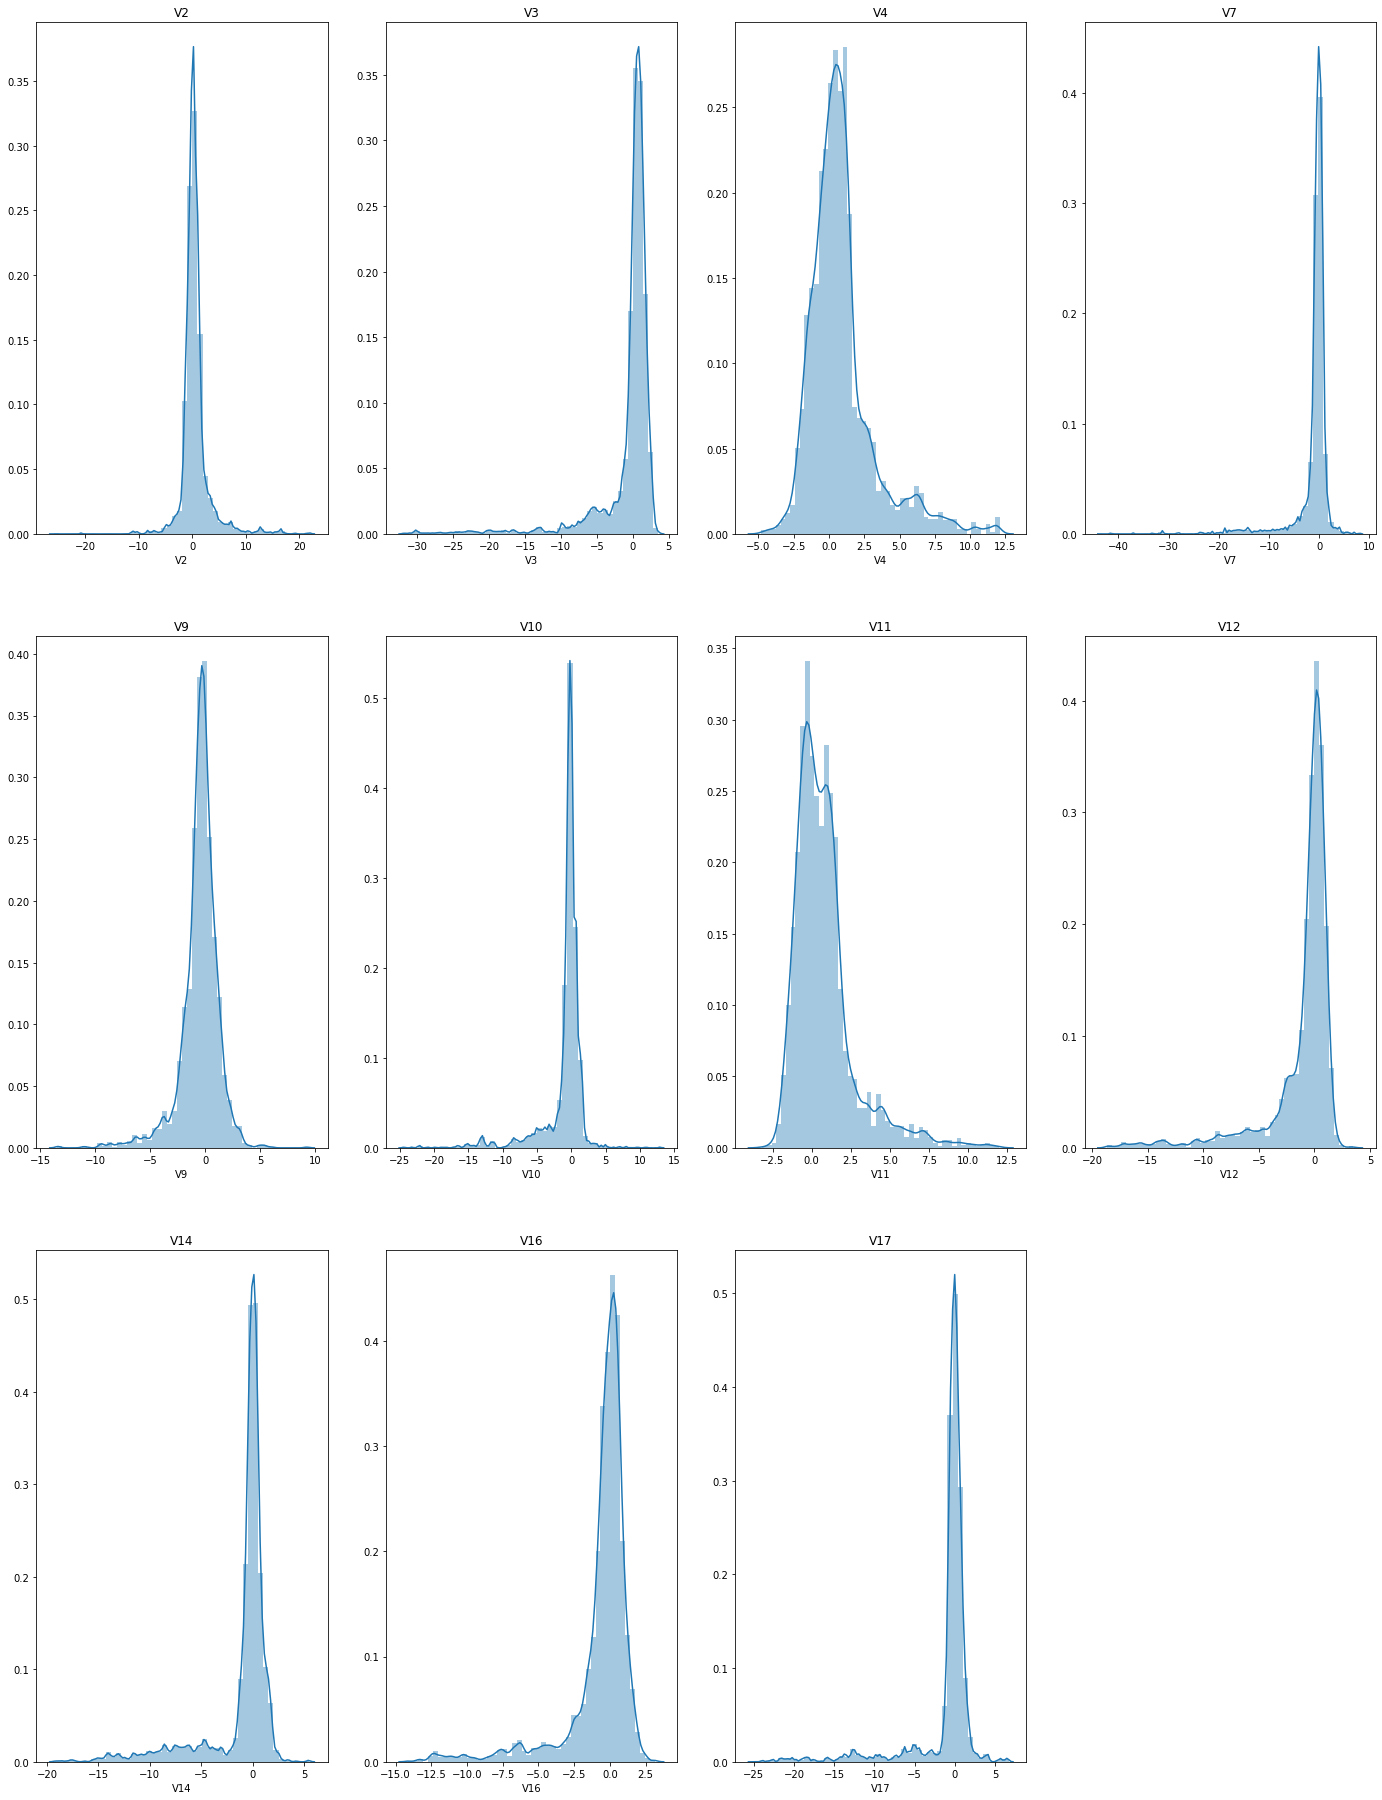

In [14]:
#Most of distributions look Gaussian with a one-sided tail so some outlier detection and removal is necessary.

f, ax = plt.subplots(figsize=(24, 32))
for i in range(len(important_feats) - 1):
    plt.subplot(3, 4, i + 1)
    plt.title(important_feats[i])
    sns.distplot(new_data[important_feats[i]])

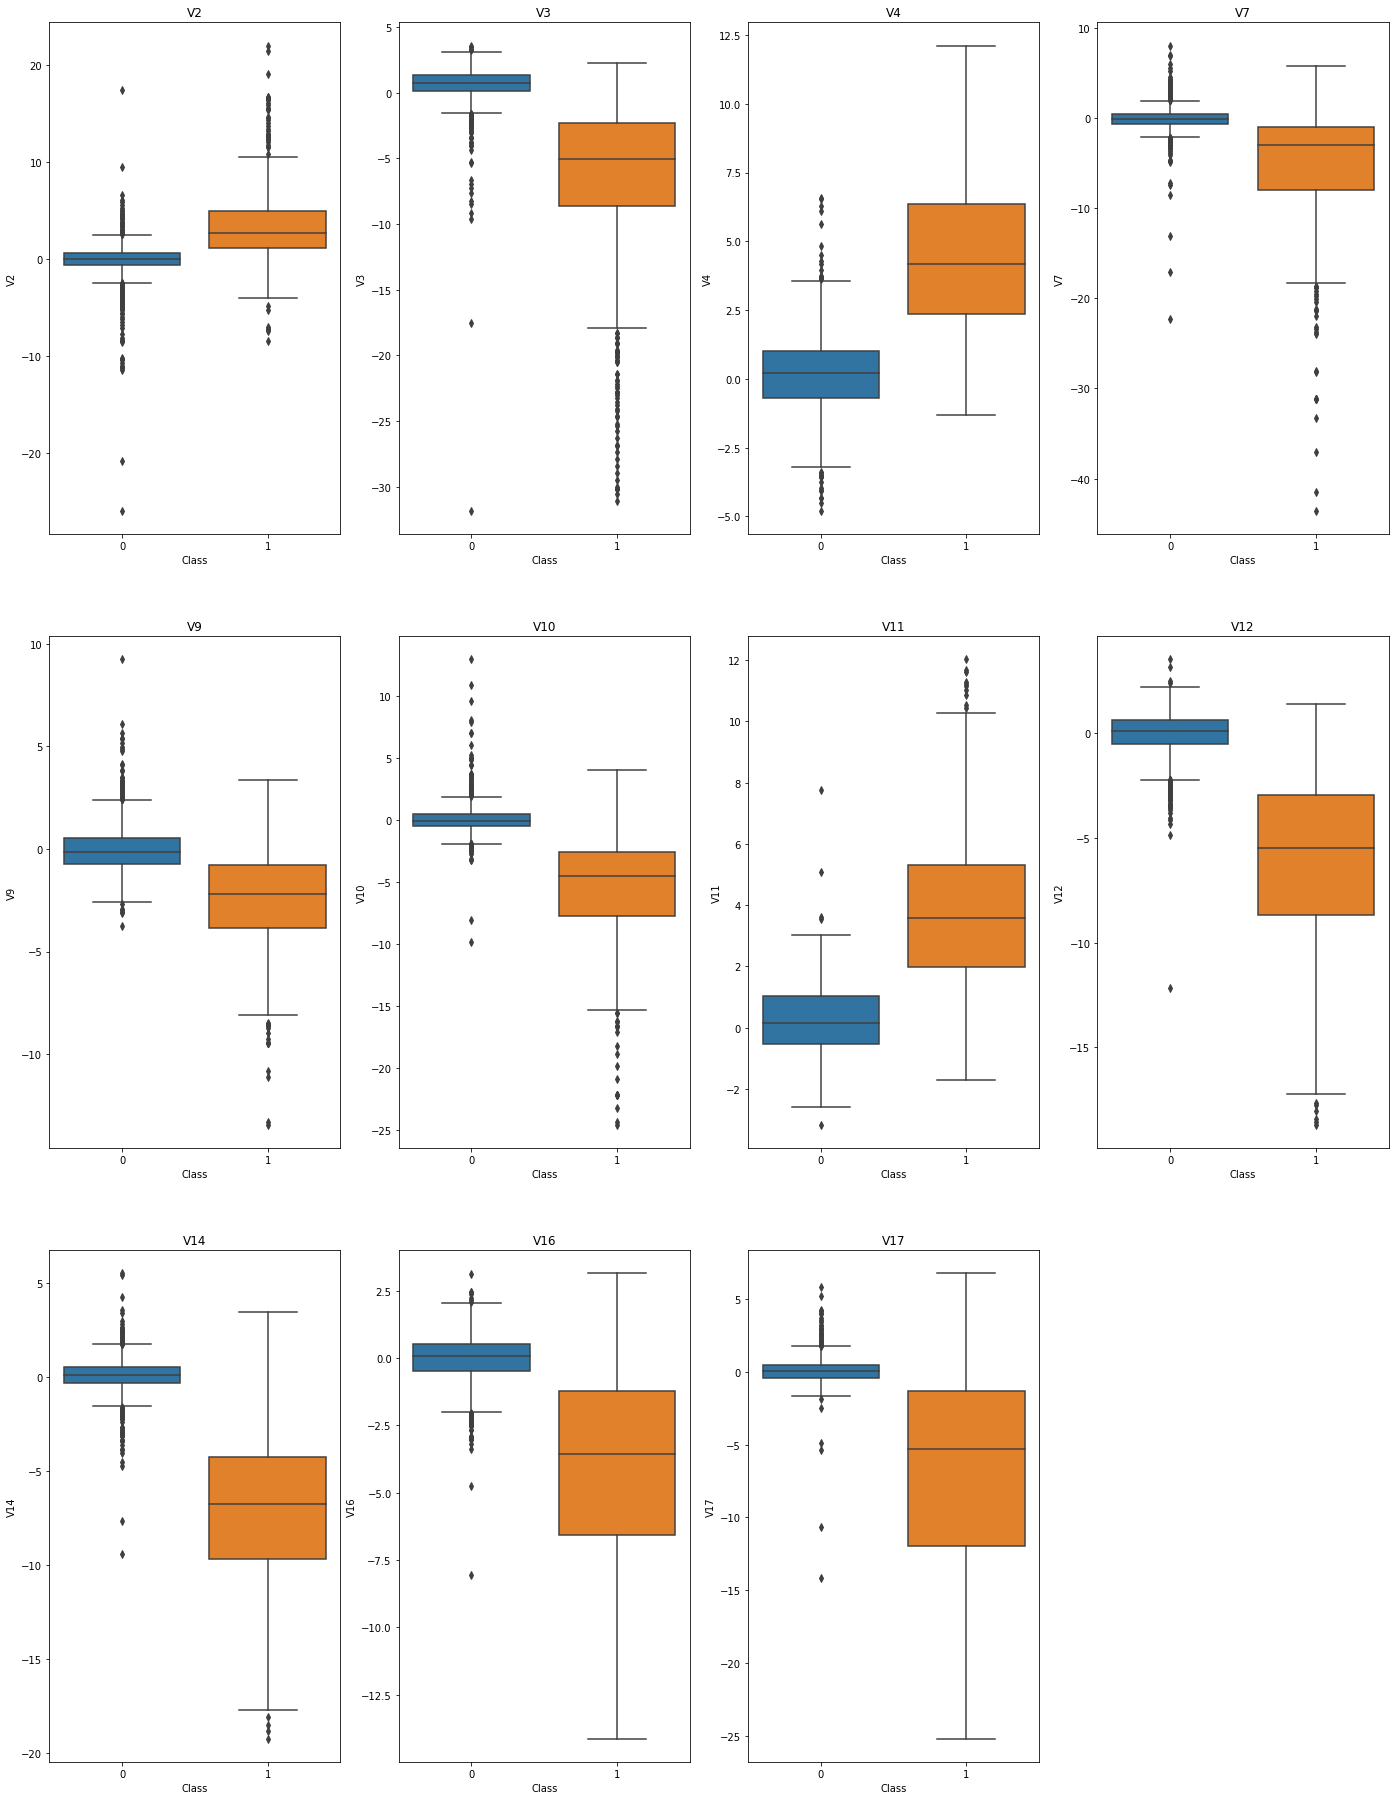

In [15]:
#Examples that correspond to fradulent samples (Class == 1) exhibit a larger dynamic range.
f, ax = plt.subplots(figsize=(24, 32))
for i in range(len(important_feats) - 1):
    plt.subplot(3, 4, i + 1)
    plt.title(important_feats[i])
    sns.boxplot(x='Class', y=important_feats[i], data=new_data)

In [16]:
lb = new_data.quantile(0.1)
ub = new_data.quantile(0.9)
rang = ub - lb
reduced_data = new_data[~((new_data < (lb - 2 * rang)) | (new_data > (ub + 2 * rang))).any(axis=1)]
features = reduced_data.drop(['Class'], axis=1, inplace=False)
features = (features - np.mean(features)) / (np.std(features) + 1e-8)
labels = reduced_data['Class']

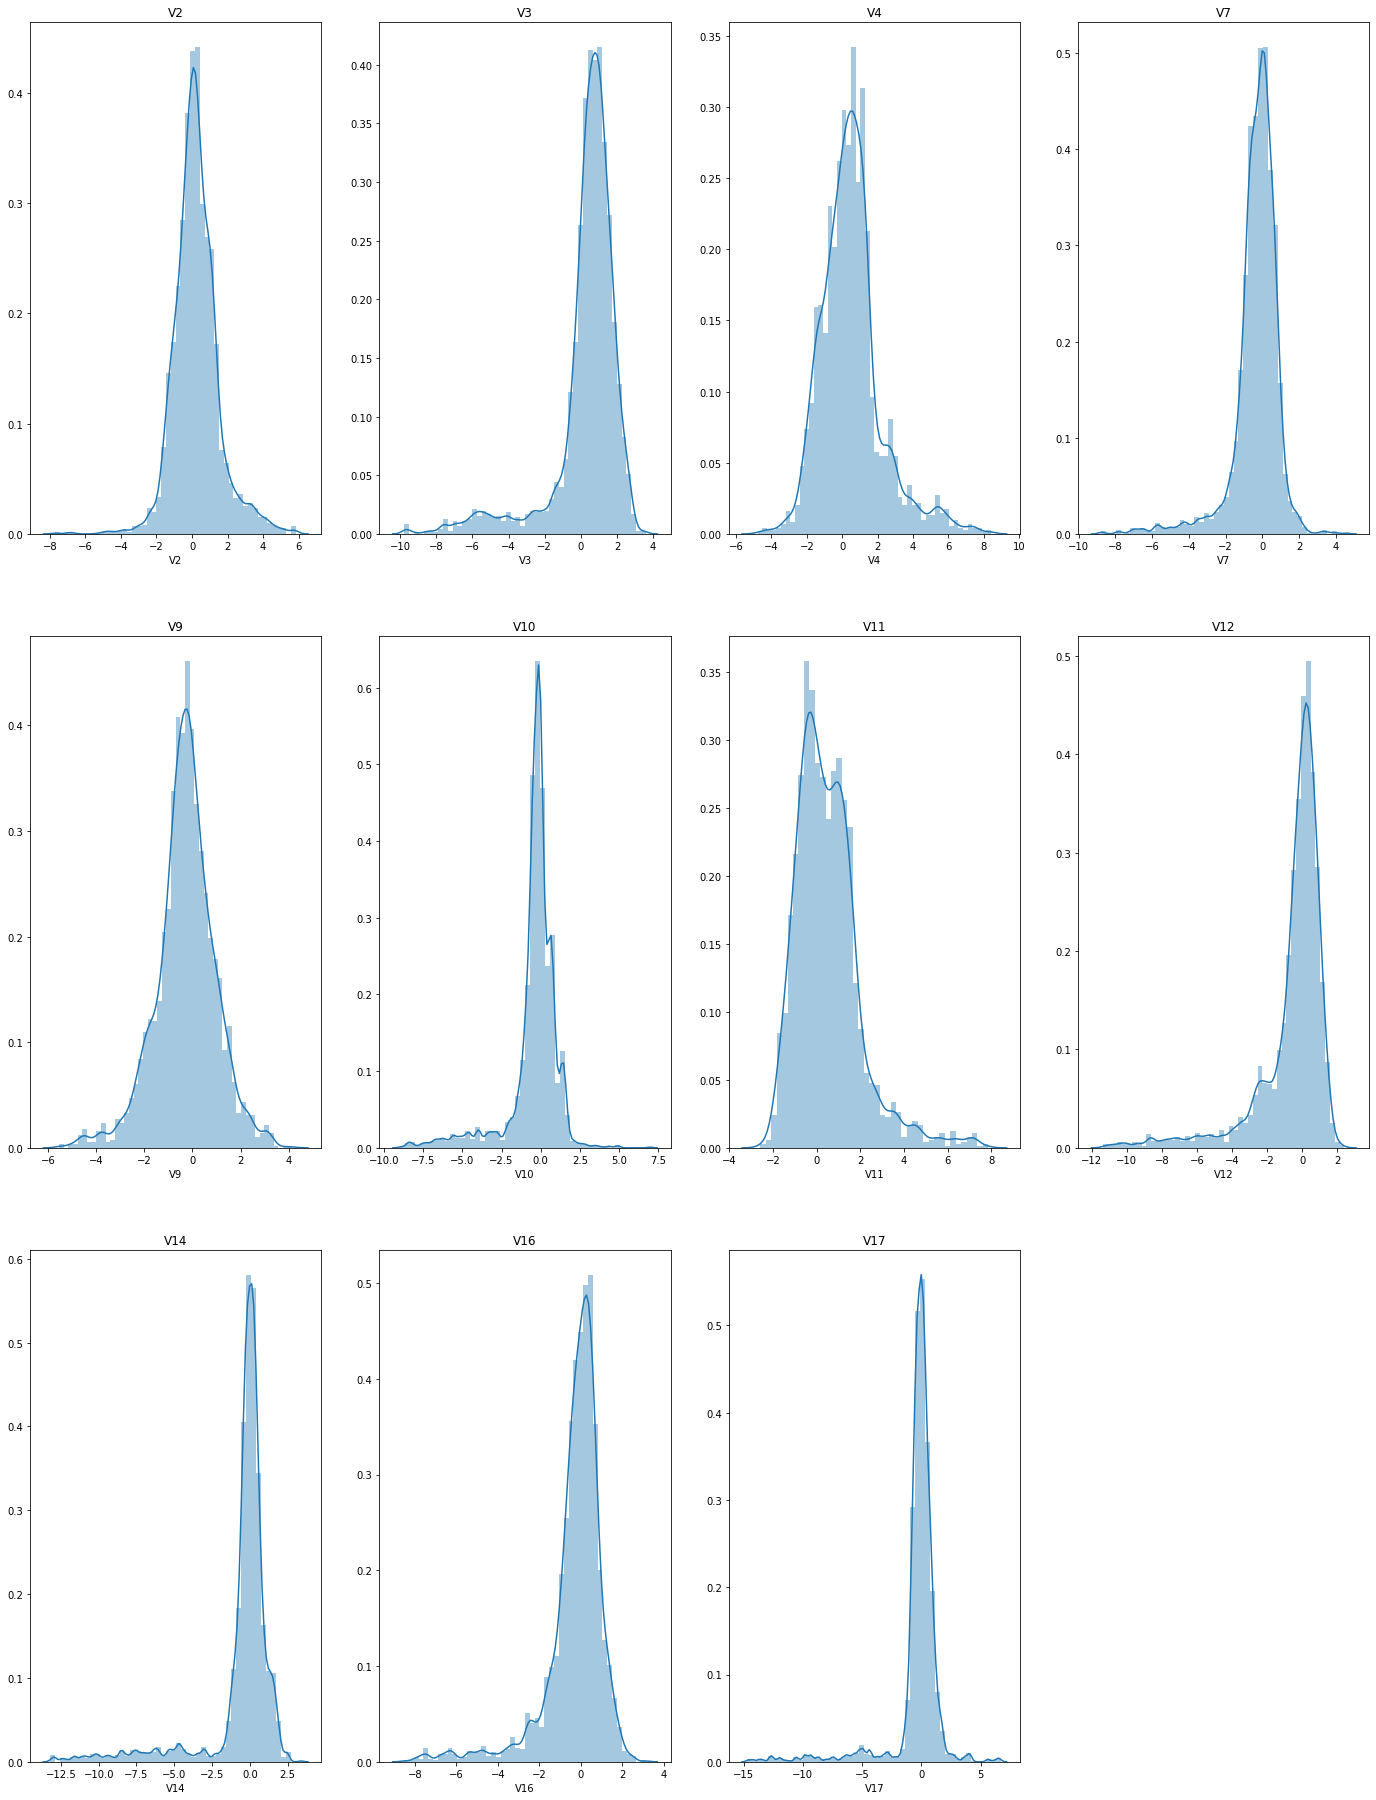

In [17]:
f, ax = plt.subplots(figsize=(24, 32))
for i in range(len(important_feats) - 1):
    plt.subplot(3, 4, i + 1)
    plt.title(important_feats[i])
    sns.distplot(reduced_data[important_feats[i]])

In [18]:
from sklearn.decomposition import PCA

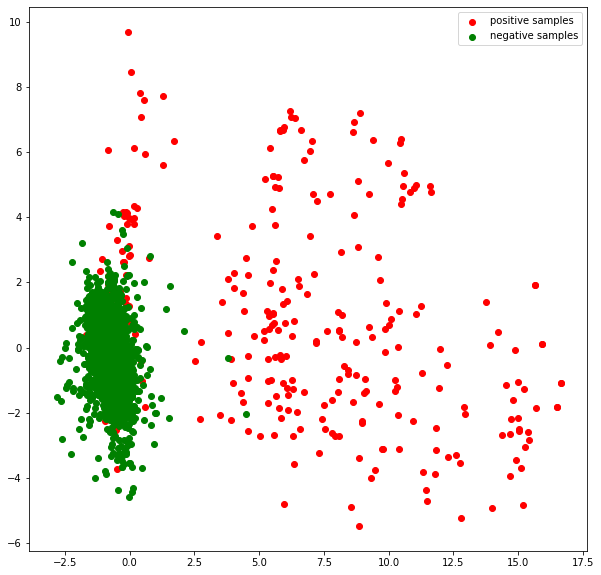

In [19]:
#data is almost linearly separable now to perform binary classification
pca_embedding =  PCA(n_components=2) 
pca_emb_data = pca_embedding.fit_transform(features.values)
plt.figure(figsize=(10,10))
plt.scatter(pca_emb_data[labels == 1, 0], pca_emb_data[labels == 1, 1], color='red', label='positive samples')
plt.scatter(pca_emb_data[labels == 0, 0], pca_emb_data[labels == 0, 1], color='green', label='negative samples')
plt.legend()